In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [2]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [3]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

In [4]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [5]:
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]
mid_range = [550, 600, 650, 700, 750, 800, 850]
all_range = [400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
short_few = [400, 550, 700]
all_few = [400, 500, 600, 700, 800, 900, 1000]
short_few2 = [400, 500, 600, 700]
extra_long = [900, 950, 1000, 1050, 1100, 1150, 1200]

In [8]:
stimulus_lst_mid = np.loadtxt('stimlst_mid_550_850.txt', dtype=int)
stimulus_lst_all = np.loadtxt('stimlst_all_400_1000.txt', dtype=int)
stimulus_lst_few_short = np.loadtxt('stimlst_few_short_400_700.txt', dtype=int)
stimulus_lst_few_all = np.loadtxt('stimlst_few_all_400_1000.txt', dtype=int)
stimulus_lst_extralong = np.loadtxt('stimlst_extralong_900_1200.txt', dtype=int)
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

## Parameter Space

In [7]:
K_lst = np.arange(1, 22, 0.5)
tau = np.arange(100, 230, 10)
seed_lst = np.arange(0, 21, 1)

# SHORT & LONG

In [18]:
path = '../results/intermediateI/'
short_ktau07_seed, long_ktau07_seed = pt.load_data(
    path+'SHORT_K1-22_TAU130_th07_del700_sig02_seed-20220923-121834-output.pickle',
    path+'LONG_K1-22_TAU130_th07_del700_sig02_seed-20220923-122722-output.pickle')

In [20]:
short_k = pt.get_mean_seed(short_ktau07_seed, K_lst, seed_lst, True)
long_k = pt.get_mean_seed(long_ktau07_seed, K_lst, seed_lst, True)

17 13.5
18 8.0


# MID & ALL

In [21]:
path = '../results/range/'
mid_data, all_data = pt.load_data(path+'inter_MID_07-20221001-115027-output.pickle',
                                  path+'inter_ALL_07-20221001-115833-output.pickle')

mid_data_seed, all_data_seed = pt.load_data(path+'inter_MID_07_seed-20221001-152829-output.pickle',
                                  path+'inter_ALL_07_seed-20221001-160258-output.pickle')

-0.23492230186963775 1.2873119081561573


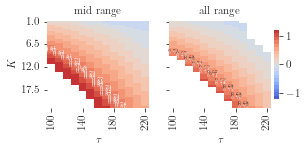

In [11]:
pt.plot_slope_behavior(mid_data, all_data, K_lst, tau)

4788.74392449582 54741.42254810985
170 17.5
[(100, 7.0), (110, 7.0), (120, 9.0), (130, 10.5), (140, 12.0), (150, 14.5), (160, 15.5), (170, 17.5), (180, 18.5), (190, 20.5), (200, 21.5), (210, 21.5), (220, 21.5)]
140 12.5
[(100, 9.0), (110, 10.0), (120, 11.5), (130, 11.0), (140, 12.5), (150, 14.0), (160, 15.5), (170, 17.0), (180, 18.0), (190, 20.5), (200, 21.0), (210, 21.5), (220, 21.0)]
mid range
['7.5,100' '8.0,100' '8.5,110' '9.0,110' '9.5,120' '10.0,120' '10.5,130'
 '11.0,130' '11.5,130' '12.0,140' '12.5,140' '13.0,140' '13.5,150'
 '14.0,150' '14.5,150' '15.0,160' '15.5,160' '16.0,160' '16.5,160'
 '17.0,170' '17.5,170' '18.0,170' '18.5,170' '19.0,180' '19.5,180'
 '20.0,180' '20.5,180' '21.0,190' '21.5,190']
all range
['8.0,100' '8.5,100' '8.5,110' '9.0,110' '9.5,110' '9.5,120' '10.0,120'
 '10.5,120' '11.0,130' '11.5,130' '12.0,140' '12.5,140' '13.0,140'
 '13.0,150' '13.5,150' '14.0,150' '15.0,160' '15.5,160' '16.0,160'
 '16.5,170' '17.0,170' '17.5,170' '18.5,180' '19.0,180' '19.5,180

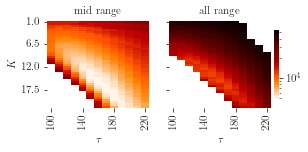

In [12]:
pt.plot_mse(mid_data, all_data, K_lst, tau)
print(pt.get_opt_K(mid_data, K_lst, tau, mse=True))
print(pt.get_opt_K(all_data, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(mid_data, all_data, K_lst, tau)

In [112]:
pt.get_mean_seed(mid_data_seed, K_lst, seed_lst)

14 11.0
14 11.0


(10.428571428571429, 0.5183700251685057)

In [22]:
mid_k = pt.get_mean_seed(mid_data_seed, K_lst, seed_lst, True)

14 11.0


In [26]:
pt.get_mean_seed(all_data_seed, K_lst, seed_lst)

5 12.0
5 12.0


(11.428571428571429, 0.5624291338579864)

In [23]:
alle_k = pt.get_mean_seed(all_data_seed, K_lst, seed_lst, True)

5 12.0


timeouts: [(550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0)]
0.7932859676448458


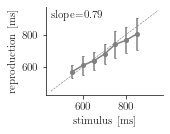

In [16]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 10.5
exp_result = expsim.simulate(stimulus_lst_mid, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

timeouts: [(550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0)]
0.816582798500381


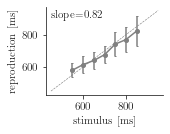

In [10]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=170, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 17.5
exp_result = expsim.simulate(stimulus_lst_mid, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.05), (1000, 0.0)]
0.705695417186016


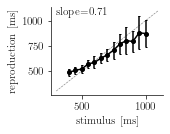

In [17]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 11
exp_result = expsim.simulate(stimulus_lst_all, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7712727139927705
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.7293959652015919
timeouts: [(550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0)]
0.7932859676448458


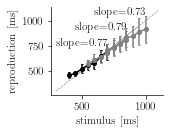

In [9]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 13
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10.5
exp_result = expsim.simulate(stimulus_lst_mid, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

# FEW SHORT & FEW ALL

In [24]:
path = '../results/range/'
few_short_data, few_all_data = pt.load_data(path+'inter_FEW_SHORT_07-20221001-143203-output.pickle',
                                            path+'inter_FEW_ALL_07-20221001-150559-output.pickle')

few_short_seed, few_all_seed = pt.load_data(path+'inter_FEW_SHORT_07_seed-20221001-161648-output.pickle',
                                            path+'inter_FEW_ALL_07_seed-20221001-162505-output.pickle')

-0.3507470227354747 1.243099255205958


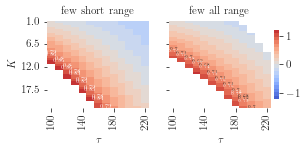

In [21]:
pt.plot_slope_behavior(few_short_data, few_all_data, K_lst, tau)

3964.095284381858 60299.92024059266
120 11.5
[(100, 8.5), (110, 9.5), (120, 11.5), (130, 12.5), (140, 14.0), (150, 15.5), (160, 17.5), (170, 20.5), (180, 20.5), (190, 21.0), (200, 21.5), (210, 21.5), (220, 21.5)]
160 15.0
[(100, 8.0), (110, 9.0), (120, 10.0), (130, 11.0), (140, 12.0), (150, 13.5), (160, 15.0), (170, 16.0), (180, 17.5), (190, 19.5), (200, 20.0), (210, 21.5), (220, 21.0)]
few short range
['8.5,100' '9.0,100' '10.0,110' '10.5,110' '11.5,120' '12.0,120'
 '13.0,130' '13.5,130' '15.0,140' '15.5,140' '17.0,150' '17.5,150'
 '19.0,160' '19.5,160' '21.5,170']
few all range
['7.5,100' '8.0,100' '8.5,110' '9.0,110' '9.5,120' '10.0,120' '10.5,130'
 '11.0,130' '11.5,140' '12.0,140' '13.0,150' '13.5,150' '14.5,160'
 '15.0,160' '16.0,170' '16.5,170' '17.5,180' '18.0,180' '18.5,180'
 '19.0,190' '19.5,190' '20.0,190' '21.5,200']


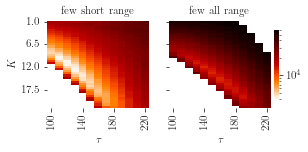

In [20]:
pt.plot_mse(few_short_data, few_all_data, K_lst, tau)
print(pt.get_opt_K(few_short_data, K_lst, tau, mse=True))
print(pt.get_opt_K(few_all_data, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(few_short_data, few_all_data, K_lst, tau)

In [13]:
pt.get_mean_seed(few_short_seed, K_lst, seed_lst)

11 13.0
11 13.0


(12.595238095238095, 0.3316282923139075)

In [14]:
pt.get_mean_seed(few_all_seed, K_lst, seed_lst)

4 12.5
4 12.5


(11.666666666666666, 0.3883215816738117)

In [26]:
path = '../results/range/'
few_short_data, few_short2_data = pt.load_data(path+'inter_FEW_SHORT_07-20221001-143203-output.pickle',
                                            path+'inter_short_few_2_07-20221005-120253-output.pickle')

few_short_seed, few_short2_seed = pt.load_data(path+'inter_FEW_SHORT_07_seed-20221001-161648-output.pickle',
                                            path+'inter_short_few_2_07_seed-20221005-121133-output.pickle')

3871.57384429949 33154.69036757382
120 11.5
[(100, 8.5), (110, 9.5), (120, 11.5), (130, 12.5), (140, 14.0), (150, 15.5), (160, 17.5), (170, 20.5), (180, 20.5), (190, 21.0), (200, 21.5), (210, 21.5), (220, 21.5)]
120 11.0
[(100, 8.5), (110, 10.0), (120, 11.0), (130, 12.5), (140, 14.0), (150, 15.5), (160, 18.5), (170, 20.5), (180, 21.5), (190, 21.5), (200, 21.5), (210, 21.0), (220, 21.5)]
long range
['8.5,100' '9.0,100' '10.0,110' '10.5,110' '11.5,120' '12.0,120'
 '13.0,130' '13.5,130' '15.0,140' '15.5,140' '17.0,150' '17.5,150'
 '19.0,160' '19.5,160' '21.5,170']
extra long range
['8.0,100' '8.5,100' '9.0,110' '9.5,110' '10.5,120' '11.0,120' '11.5,120'
 '12.0,130' '12.5,130' '13.0,130' '14.0,140' '14.5,140' '15.0,140'
 '16.0,150' '16.5,150' '17.0,150' '18.0,160' '18.5,160' '19.0,160'
 '20.5,170' '21.0,170' '21.5,170']


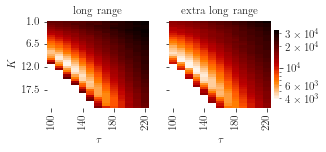

In [38]:
pt.plot_mse(few_short_data, few_short2_data, K_lst, tau)
print(pt.get_opt_K(few_short_data, K_lst, tau, mse=True))
print(pt.get_opt_K(few_short2_data, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(few_short_data, few_short2_data, K_lst, tau)

In [39]:
pt.get_mean_seed(few_short2_seed, K_lst, seed_lst)

8 13.0
8 13.0


(12.547619047619047, 0.2629847861235062)

In [27]:
short_few_k = pt.get_mean_seed(few_short2_seed, K_lst, seed_lst, True)
alle_few_k = pt.get_mean_seed(few_all_seed, K_lst, seed_lst, True)

8 13.0
4 12.5


## Extra long

In [12]:
path = '../results/'
long_data, extralong_data = pt.load_data(path+'intermediateI/LONG_K1-22TAU_th07_del700_sig02_fixed_seed-20220907-165928-output.pickle',
                                            path+'range/inter_EXTRALONG_07-20221004-143144-output.pickle')

long_seed, extralong_seed = pt.load_data(path+'intermediateI/LONG_K1-22_TAU130_th07_del700_sig02_seed-20220923-122722-output.pickle',
                                            path+'range/inter_EXTRALONG_07_seed-20221004-133405-output.pickle')

8632.2919290215 97013.88568165064
200 20.0
[(100, 4.0), (110, 4.5), (120, 7.0), (130, 10.0), (140, 10.5), (150, 12.0), (160, 13.5), (170, 15.5), (180, 16.5), (190, 18.5), (200, 20.0), (210, 21.5), (220, 21.5)]
210 15.0
[(100, 2.5), (110, 3.0), (120, 3.0), (130, 3.5), (140, 3.5), (150, 6.0), (160, 7.0), (170, 9.5), (180, 11.5), (190, 13.5), (200, 13.0), (210, 15.0), (220, 16.0)]
short range
['8.5,100' '9.0,100' '9.0,110' '9.5,110' '10.0,120' '10.5,130' '11.0,130'
 '11.5,140' '12.0,140' '12.5,140' '12.5,150' '13.0,150' '13.5,150'
 '14.0,160' '14.5,160' '15.0,170' '15.5,170' '16.0,170' '16.5,180'
 '17.0,180' '17.5,180' '18.0,180' '18.0,190' '18.5,190' '19.0,190'
 '19.5,190' '20.0,200' '20.5,200' '21.0,200']
long range
['7.5,130' '8.0,120' '8.0,130' '8.0,140' '8.5,110' '8.5,120' '8.5,140'
 '8.5,150' '9.0,120' '9.0,150' '9.5,110' '9.5,150' '9.5,160' '10.0,110'
 '10.0,160' '10.5,160' '10.5,170' '11.0,170' '11.5,170' '12.0,180'
 '12.5,180' '12.5,190' '13.0,190' '13.5,190' '14.0,200' '14.5,200

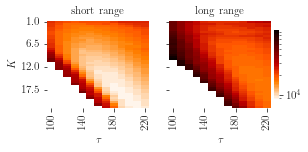

In [13]:
pt.plot_mse(long_data, extralong_data, K_lst, tau)
print(pt.get_opt_K(long_data, K_lst, tau, mse=True))
print(pt.get_opt_K(extralong_data, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(long_data, extralong_data, K_lst, tau)

timeouts: [(900, 0.0), (950, 0.0), (1000, 0.01), (1050, 0.0), (1100, 0.01), (1150, 0.0), (1200, 0.0)]
0.31461270686163717


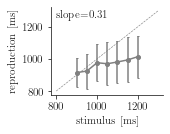

In [33]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 3.5
exp_result = expsim.simulate(stimulus_lst_extralong, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

timeouts: [(900, 0.0), (950, 0.0), (1000, 0.0), (1050, 0.0), (1100, 0.0), (1150, 0.0), (1200, 0.0)]
0.6812378485390838


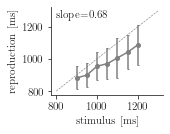

In [34]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=210, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 15
exp_result = expsim.simulate(stimulus_lst_extralong, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

In [28]:
pt.get_mean_seed(extralong_seed, K_lst, seed_lst)

3 3.0
3 3.0


(3.119047619047619, 1.7175894092258508)

In [30]:
extralong_k = pt.get_mean_seed(extralong_seed, K_lst, seed_lst, True)

3 3.0


## Results

In [48]:
def evar(x):
    return np.mean(x)/np.var(x)

In [43]:
import itertools
dists = [short_k, mid_k, long_k, extralong_k, alle_k, short_few_k, alle_few_k]
dists_name = ['short', 'mid', 'long', 'extralong', 'alle', 'short_few', 'alle_few']

In [44]:
from scipy import stats
for combo, name in zip(itertools.combinations(dists, 2), itertools.combinations(dists_name, 2)):  # 2 for pairs, 3 for triplets, etc
    print(name)
    print(stats.ks_2samp(combo[0], combo[1]))

('short', 'mid')
KstestResult(statistic=1.0, pvalue=3.715691111961505e-12)
('short', 'long')
KstestResult(statistic=1.0, pvalue=3.715691111961505e-12)
('short', 'extralong')
KstestResult(statistic=1.0, pvalue=3.715691111961505e-12)
('short', 'alle')
KstestResult(statistic=0.9047619047619048, pvalue=3.1992100473988563e-09)
('short', 'short_few')
KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314)
('short', 'alle_few')
KstestResult(statistic=0.9047619047619048, pvalue=3.1992100473988563e-09)
('mid', 'long')
KstestResult(statistic=0.8095238095238095, pvalue=4.1589730616185135e-07)
('mid', 'extralong')
KstestResult(statistic=1.0, pvalue=3.715691111961505e-12)
('mid', 'alle')
KstestResult(statistic=0.6666666666666666, pvalue=0.00010024313356518223)
('mid', 'short_few')
KstestResult(statistic=1.0, pvalue=3.715691111961505e-12)
('mid', 'alle_few')
KstestResult(statistic=0.8095238095238095, pvalue=4.1589730616185135e-07)
('long', 'extralong')
KstestResult(statistic=1.0, pva

(None,)

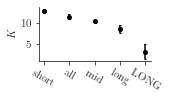

In [76]:
plt.figure(figsize=(2,1))
ax = plt.axes()

short, short_ = 12.88, 0.34
mid, mid_ = 10.43, 0.52
long, long_ = 8.57, 0.99
LONG, LONG_ = 3.12, 1.72
alle, alle_ = 11.45, 0.56


plt.errorbar(1, short, yerr=short_, fmt='-o', c='k', capsize=1, markersize=4)
plt.errorbar(2, alle, yerr=alle_, fmt='-o', c='k', capsize=1, markersize=4)

plt.errorbar(3, mid, yerr=mid_, fmt='-o', c='k', capsize=1, markersize=4)
plt.errorbar(4, long, yerr=long_, fmt='-o', c='k', capsize=1, markersize=4)
plt.errorbar(5, LONG, yerr=LONG_, fmt='-o', c='k', capsize=1, markersize=4)


ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([1,2,3,4,5], ['short', 'all', 'mid', 'long', 'LONG'], rotation=-30)

plt.ylabel(r'$K$', fontsize=11)

plt.savefig('../report/figures/range_result.svg', dpi=500, bbox_inches='tight'), 

(None,)

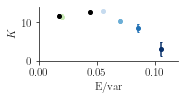

In [102]:
plt.figure(figsize=(2.5,1))
ax = plt.axes()

short, short_ = 12.88, 0.34
mid, mid_ = 10.43, 0.52
long, long_ = 8.57, 0.99
LONG, LONG_ = 3.12, 1.72
alle, alle_ = 11.45, 0.56

shortfew, shortfew_ = 12.55, 0.26
allefew, allefew_ = 11.67, 0.39



plt.errorbar(evar(range_short), short, yerr=short_, fmt='-o', c='#c6dbef', capsize=1, markersize=4)
plt.errorbar(evar(mid_range), mid, yerr=mid_, fmt='-o', c='#6baed6', capsize=1, markersize=4)
plt.errorbar(evar(range_long), long, yerr=long_, fmt='-o', c='#2171b5', capsize=1, markersize=4)
plt.errorbar(evar(extra_long), LONG, yerr=LONG_, fmt='-o', c='#08306b', capsize=1, markersize=4)

plt.errorbar(evar(all_range), alle, yerr=alle_, fmt='-o', c='#c7e9b4ff', capsize=1, markersize=4)

plt.errorbar(evar(short_few2), shortfew, yerr=shortfew_, fmt='-o', c='k', capsize=1, markersize=4)
plt.errorbar(evar(all_few), allefew, yerr=allefew_, fmt='-o', c='k', capsize=1, markersize=4)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.xticks([1,2,3,4,5], ['short', 'all', 'mid', 'long', 'LONG'], rotation=-30)

plt.ylabel(r'$K$', fontsize=11)
plt.xlabel('E/var', fontsize=11)
plt.ylim(0,14)
plt.xlim(0,0.12)


plt.savefig('../report/figures/range_resultEVAR.svg', dpi=500, bbox_inches='tight'), 

In [50]:
print('short', np.mean(range_short), np.var(range_short), evar(range_short))
print('short few', np.mean(short_few), np.var(short_few), evar(short_few))
print('all', np.mean(all_range), np.var(all_range), evar(all_range))
print('all few', np.mean(all_few), np.var(all_few), evar(all_few))
print('mid', np.mean(mid_range), np.var(mid_range), evar(mid_range))
print('long', np.mean(range_long), np.var(range_long), evar(range_long))
print('LONG', np.mean(extra_long), np.var(extra_long), evar(extra_long))

short 550.0 10000.0 0.055
short few 550.0 15000.0 0.03666666666666667
all 700.0 35000.0 0.02
all few 700.0 40000.0 0.0175
mid 700.0 10000.0 0.07
long 850.0 10000.0 0.085
LONG 1050.0 10000.0 0.105


Text(0.5, 0, 'E/var')

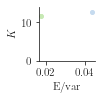

In [97]:
plt.figure(figsize=(1,1))
ax = plt.axes()

shortfew, shortfew_ = 12.55, 0.26
allefew, allefew_ = 11.67, 0.39


plt.errorbar(evar(short_few2), shortfew, yerr=shortfew_, fmt='-o', c='#c6dbef', capsize=1, markersize=4)
plt.errorbar(evar(all_few), allefew, yerr=allefew_, fmt='-o', c='#c7e9b4ff', capsize=1, markersize=4)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0,14)

plt.ylabel(r'$K$', fontsize=11)
plt.xlabel('E/var', fontsize=11)

In [85]:
print('short undersampled', evar(short_few2))
print('all undersampled', evar(all_few))

short undersampled 0.044
all undersampled 0.0175
